# Traveloka take home assestment

### Objective: 
We want to know which algorithm maximizes engagement. To do so, we will conduct an A/B test.

### Things to consider:
There are several potential confounding factors that we need to take into account.

* The login state of the user. Perhaps, Users that are logged in have more data and different algorithms are more optimized when they have little data or a lot of data
* The interface, we would like to know if different algorithms perform better for different interfaces.
* We also see if other variables such as date play a role

#### Assumption:
* Assumed that algorithim allocation was done randomly
* Assumed that sample given was collected randomly
* Assume each observation was independent from each other


### Hypothesis

Due to the different segments and multiple treatments within our experiment, we have multiple null and alternative hypothesis.



**1st Null hypothesis** : There is no meaningful difference in engagement rate between control treatment and alt_a and differences are due to random chance

**2nd Null hypothesis** : There is no difference in engagement rate between control treatment and alt_b and differences are due to random chance

**3rd Null hypothesis** : There is no difference in engagement rate between alt_a treatment and alt_b and differences are due to random chance



**1st Alternative hypothesis** : There is a significant difference in engagement rate between control treatment and alt_a 

**2nd Alternative hypothesis** : There is a significant difference in engagement rate between control treatment and alt_a 

**3rd Alternative hypothesis** : There is a significant difference in engagement rate between alt_a treatment and alt_b


**Note: We can use a 1 tailed t-test as what we are interested is whether the conversion rate of a particular variant is better than the control variant and each other, however to be very strict, we use a two tailed t-test. If so our null-hyp would whether engagement rate using alt-x is greater than control**


As we are dealing with different interfaces and login states, we will conduct hypothesis testing seperately for the different segments


### Metrics

The metric for this experiment is the **engagment rate** which is defined as 

**engagment rate** : content engaged / content seen

We will also be calculating lift which is the imporvement of engagement rate between 2 different algorithims. Lift is an important metric that was included as while statistical signficant shows us the difference that occurs is unlikely due to random chance, it does not answer if the difference is actually meaningful for us. It also is influenced by our sample size. A larger sample size allows us to detect statisitical significance better. However in this case, we want to know by how much has the engagement rate improved by? 




### Procedure

There were several steps taken before we conduct the test.

1. Data cleaning and EDA. 
2. Experiment blocking / segment our data
3. Power analysis. The sample size is quite large but we can never be to sure

Finally we choose to utilize a t-test to conduct our A/B test.

#### Blocking

Based on the data, we see that users with a login state(identified) = FALSE almost all were given the control treatment. As the the number of users with a login = FALSE were very small compared to logged in Users, they were removed from our test.

As mentioned in the hypothesis section, as there are different interfaces, we will segment them before conducting the hypothesis test. The allocation of treatments were disproportional past certain dates, to account for that we restrict the dates too. 

#### Avoiding p-hacking
As we are conducting multiple hypothesis test, we also use a Šidák correction as we are doing multiple comparisons. This is because we want to avoid p-hacking or p-fishing and also since these are independent test, we use Šidák correction over a Bonferroni correction


## Results

#### mobile-android interface 


The lift percentages were : 
1. lift alt_a vs control: 80.21%
2. lift alt_b vs control: 61.17%
3. lift alt_a vs alt_b: 11.81% 


Adjusted p values for each test:  
1.  0.       
2.  0.       
3.  0.050147

adjusted alpha Šidák:  0.017 

#### mobile-ios interface 


The lift percentages were : 

1.  lift alt_a vs control: 105.49%
2.  lift alt_b vs control: 77.29%
3.  lift alt_a vs alt_b: 15.91% 


adjusted p values for each test: 
1. 3.19061444e-11
2. 6.22256248e-07
3. 2.71050077e-01

adjusted alpha Šidák:  0.017 

#### Alt_a vs control

From the results we that for both android and iOS, alt a improved the engagement rate of control algorithm significantly. With an adjusted p-value of 0.017 the result is indeed significantly and this is also reflected in the lift 80% improvement for android interface and 105.49% improvement for iOS. 
The improvements were more higher for iOS This could be the due to the android users having a higher volume. 

#### Alt_b vs control

The results alt B also showed significant improvement for their engagement rate. The results were statisitcally significant for both interfaces, even with the adjusted p-value of 0.017. The lift improvement was still large, a 61% improvement for android and 77.29% for iOS. This is consistent with the previous result where the improvement in engagement was higher in ios than for android users. 

#### Alt_a vs Alt_b

For all interfaces, The improvement between alt_a vs alt_b is not statistically significant. However, we can see that the alt_a has a higher lift 11.81% for android vs 15.91% in iOS. 

For detailed results, please view the hypothesis section below


### Conclusion

Based on the results of our A/B test. We see that **Alt_a** performs the best to maximize engagement when we take into account lift on both interfaces. That said, the differences in engagement performance between alt_a vs alt_b could be due to random chance. However, if we use a one tailed t-test we do see that alt-a indeed has a greater engagement rate than alt-b (adjusted p-value: 0.025) but only for the Android interface. This difference is probably detected due to the larger sample size for android. (Please check last section for t-test result)





### References

Ngo, Nguyen. “The Math behind A/B Testing with Example Python Code.” Medium, Towards Data Science, 17 Jan. 2020, https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f. 

Zheng, Paulina. “An Overview of Methods to Address the Multiple Comparison Problem.” Medium, Towards Data Science, 7 Aug. 2018, https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92. 

“Experimental Design and Blocking.” Data Science Discovery, https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Experimental-Design-and-Blocking/. 

https://app.datacamp.com/learn/courses/analyzing-marketing-campaigns-with-pandas

https://app.datacamp.com/learn/courses/experimental-design-in-python







# Libraries 

In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from matplotlib import rcParams
from google.colab import drive
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels as sm
from statsmodels.stats import power as pwr
import statsmodels.api as smapi

#-------------------------------
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
mock_experiment_df = pd.read_csv('/content/gdrive/MyDrive/traveloka/Data_Scientist_-_Take_Home_Test/mock_experimentation_log.csv',
                                 parse_dates = ['event_timestamp'])

mock_homepage_df = pd.read_csv('/content/gdrive/MyDrive/traveloka/Data_Scientist_-_Take_Home_Test/mock_homepage_carousel_log.csv',
                                 parse_dates = ['event_timestamp'])

In [ ]:
# regex to clean treatment col
mock_experiment_df['treatment'] = mock_experiment_df['treatment'].replace({r"{": r""},regex=True)
mock_experiment_df['treatment'] = mock_experiment_df['treatment'].replace({r"}": r""},regex=True)
mock_experiment_df['treatment'] = mock_experiment_df['treatment'].replace({r"(variant)\":\"(.+)\"": r"\2"},regex=True)
mock_experiment_df['treatment'] = mock_experiment_df['treatment'].replace({r"\"": r""},regex=True)


In [ ]:
mock_experiment_df.tail()

,event_timestamp,unit_id,identified,interface,treatment
88604,2021-05-03 14:26:23,mhg40WMu4R55s7qP+SRcGSFuGv4=,False,mobile-iOS,alt_a
88605,2021-05-03 12:44:25,ov4ikC+XujcXPsFfrB/9Plkqze8=,True,mobile-android,alt_a
88606,2021-05-03 20:48:15,cxEUUweEeFgIfCnVfJ6gyGJ3isA=,False,mobile-iOS,control
88607,2021-05-03 15:26:01,4uSkNAemotDQOckqi41wk9ZDLn0=,True,mobile-android,control
88608,2021-05-03 18:07:34,nhH4YUUGj+imHymObEADrKhBgec=,True,mobile-android,alt_b


In [ ]:
# extract dates only
mock_experiment_df["date"] = [d.date() for d in mock_experiment_df["event_timestamp"]]
mock_homepage_df["date"] = [d.date() for d in mock_homepage_df["event_timestamp"]]

# Ensure that daily user trends for both interfaces equal


In [ ]:
# checking if same pattern for both ios and android
ios_df = mock_experiment_df[(mock_experiment_df['interface']=='mobile-iOS') & (mock_experiment_df['treatment']=='alt_a')]
android_df = mock_experiment_df[(mock_experiment_df['interface']=='mobile-android') & (mock_experiment_df['treatment']=='alt_a')]

daily_users_ios = ios_df.groupby(['date'])['unit_id'].nunique()
daily_users_android = android_df.groupby(['date'])['unit_id'].nunique()

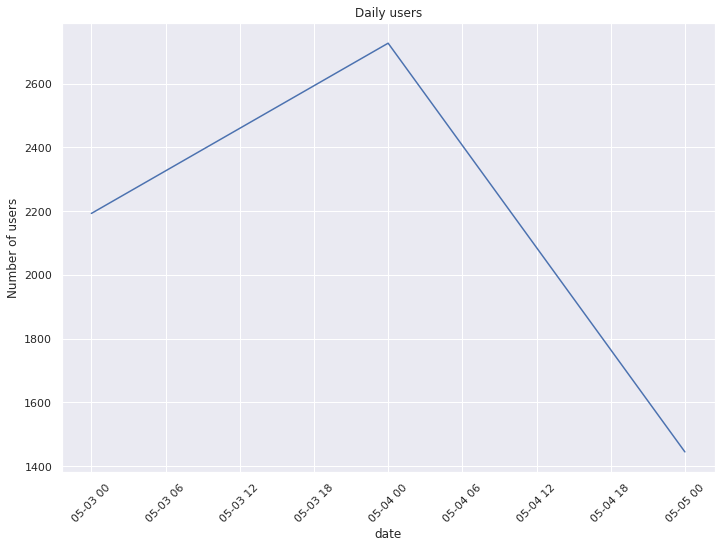

In [ ]:
# Plot daily_subscribers
daily_users_ios.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

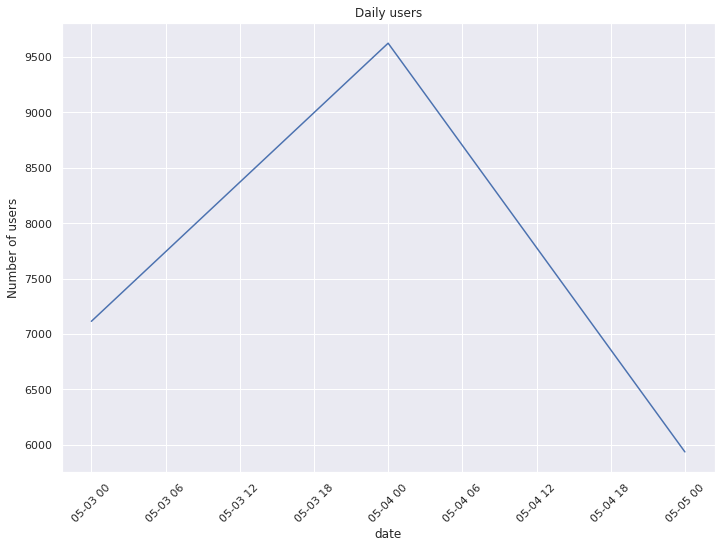

In [ ]:
# Plot daily_subscribers
daily_users_android.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

### Merge the dataframes

In [ ]:
merged_df = pd.merge(mock_experiment_df,mock_homepage_df,how='inner',on='unit_id')

# converting event name to boolean values 
merged_df['Converted'] = np.where(merged_df['event_name'] == 'CONTENTS ENGAGED', True, False)


In [ ]:
merged_df.head()

,event_timestamp_x,unit_id,identified_x,interface_x,treatment,date_x,event_timestamp_y,identified_y,interface_y,event_name,date_y,Converted
0,2021-05-05 00:33:56,m8wVa7J9I6XLoN6tAM3LZ9NsMu8=,True,mobile-android,alt_a,2021-05-05,2021-05-05 00:44:28,True,mobile-android,CONTENTS SEEN,2021-05-05,False
1,2021-05-05 00:33:56,m8wVa7J9I6XLoN6tAM3LZ9NsMu8=,True,mobile-android,alt_a,2021-05-05,2021-05-05 00:45:28,True,mobile-android,CONTENTS SEEN,2021-05-05,False
2,2021-05-04 00:59:04,9RruApLe0crXh53rUU9ljHHyEOY=,True,mobile-android,alt_a,2021-05-04,2021-05-05 04:41:26,True,mobile-android,CONTENTS SEEN,2021-05-05,False
3,2021-05-05 02:56:30,S0loF0Ph8hDgrYDE9VzKaKvDg6I=,True,mobile-android,alt_a,2021-05-05,2021-05-05 04:10:19,True,mobile-android,CONTENTS SEEN,2021-05-05,False
4,2021-05-05 02:54:08,S0loF0Ph8hDgrYDE9VzKaKvDg6I=,False,mobile-android,alt_a,2021-05-05,2021-05-05 04:10:19,True,mobile-android,CONTENTS SEEN,2021-05-05,False


### Engagement difference between interface

In [ ]:
total = mock_homepage_df.groupby(['interface'])['unit_id'].nunique()

converted = mock_homepage_df[mock_homepage_df['event_name'] == 'CONTENTS ENGAGED']\
                       .groupby(['interface'])\
                       ['unit_id'].nunique()

interface_rate = converted/total * 100

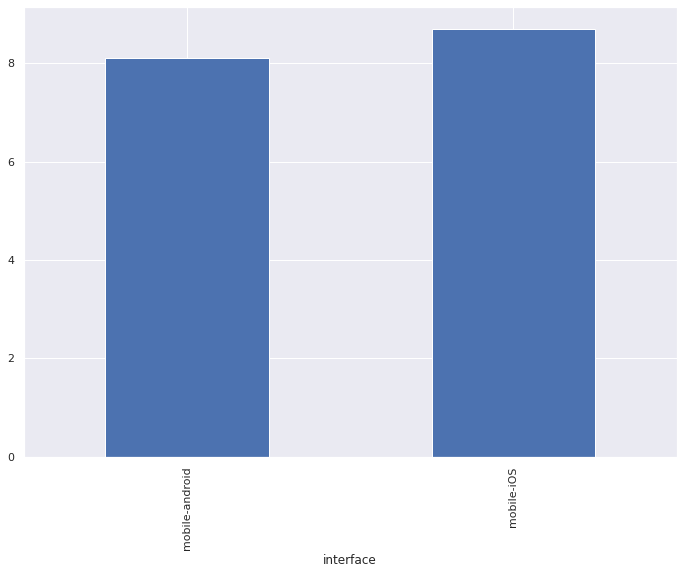

In [ ]:
interface_rate.plot(kind='bar')

### Engagement difference between algo


In [ ]:
total = merged_df.groupby(['treatment'])['unit_id'].nunique()

converted = merged_df[merged_df['event_name'] == 'CONTENTS ENGAGED']\
                              .groupby(['treatment'])\
                              ['unit_id'].nunique()

algo_rate = converted/total * 100                       

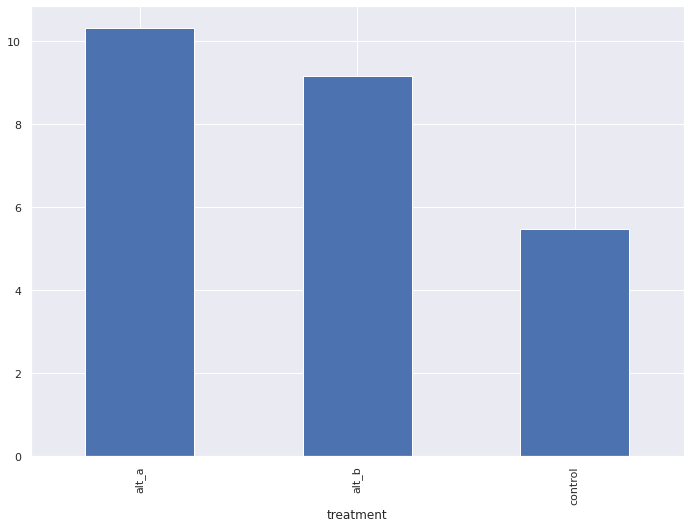

In [ ]:
algo_rate.plot(kind='bar')

### Engagement rate on different dates

In [ ]:
total = merged_df.groupby(['date_y'])['unit_id'].nunique()

converted = merged_df[merged_df['event_name'] == 'CONTENTS ENGAGED']\
                              .groupby(['date_y'])\
                              ['unit_id'].nunique()

date_rate = converted/total * 100               

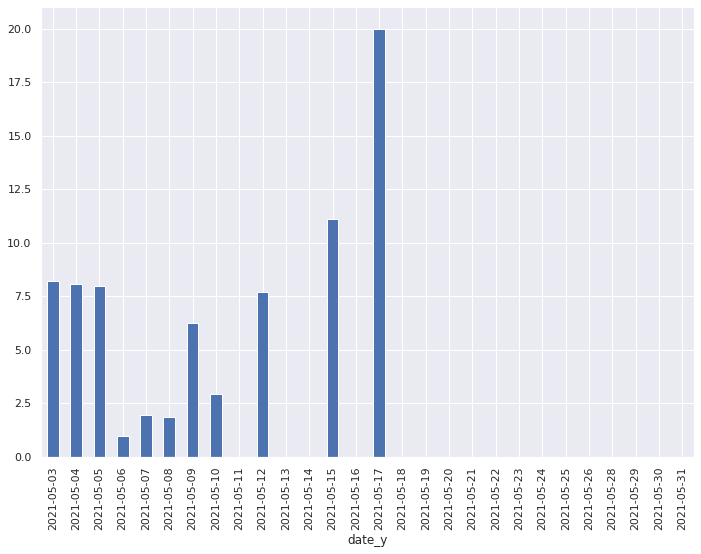

In [ ]:
date_rate.plot(kind='bar')

### Engagement rate between date and treatment



In [ ]:
total = merged_df.groupby(['date_y','treatment'])['unit_id'].nunique()


converted = merged_df[merged_df['event_name'] == 'CONTENTS ENGAGED']\
                              .groupby(['date_y','treatment'])\
                              ['unit_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = converted/total * 100
daily_df = pd.DataFrame(daily_conversion_rate)
daily_df = daily_df.reset_index(level=[0,1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

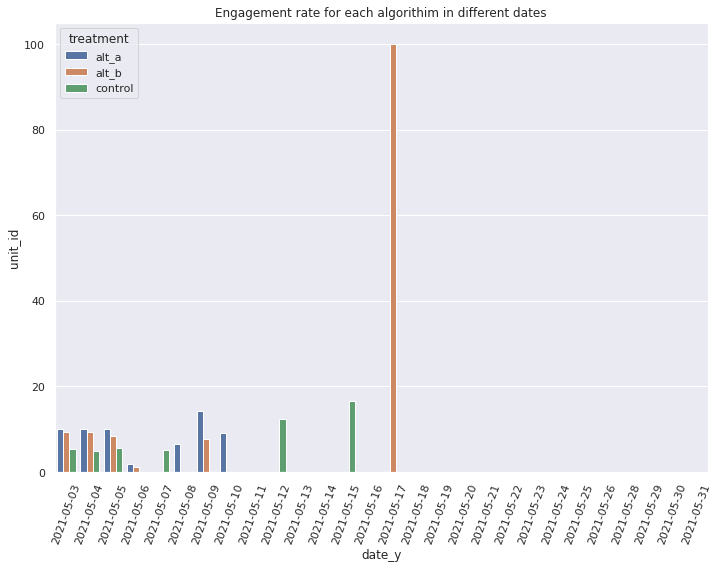

In [ ]:
ax = sns.barplot(x='date_y',y='unit_id',hue='treatment',data=daily_df)
ax.set(title='Engagement rate for each algorithim in different dates')
plt.xticks(rotation=70)

### allocation of algorithims on different dates

In [ ]:
dates = merged_df.groupby(['date_y','treatment'])['unit_id'].nunique()
dates_df = pd.DataFrame(dates)
dates_df = dates_df.reset_index(level=[0,1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

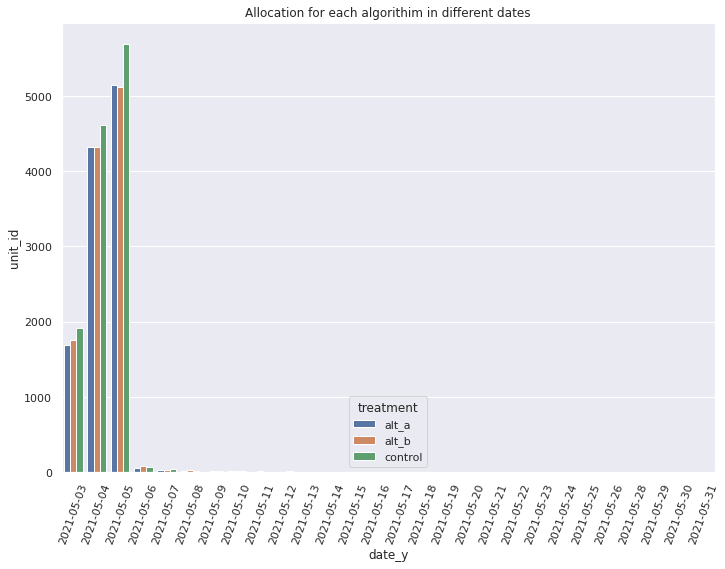

In [ ]:
ax = sns.barplot(x='date_y',y='unit_id',hue='treatment',data=dates_df)
ax.set(title='Allocation for each algorithim in different dates')
plt.xticks(rotation=70)

### Engagement rate between difference in algo and interface

In [ ]:
total = merged_df.groupby(['interface_y','treatment'])['unit_id'].nunique()


converted = merged_df[merged_df['event_name'] == 'CONTENTS ENGAGED']\
                              .groupby(['interface_y','treatment'])\
                              ['unit_id'].nunique()

# Calculate the conversion rate per day
interface_algo_conversion_rate = converted/total * 100
interface_algo_df = pd.DataFrame(interface_algo_conversion_rate)
interface_algo_df = interface_algo_df.reset_index(level=[0,1])

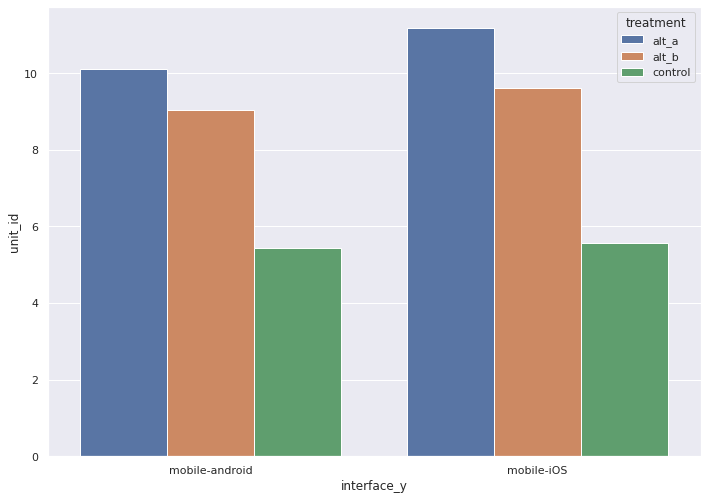

In [ ]:
ax = sns.barplot(x='interface_y',y='unit_id',hue='treatment',data=interface_algo_df)

# Engagement between login states

Noticable difference between conversion rate between Users that are logged in vs users that are not





In [ ]:
total = merged_df.groupby(['identified_y'])['unit_id'].nunique()


converted = merged_df[merged_df['event_name'] == 'CONTENTS ENGAGED']\
                              .groupby(['identified_y'])\
                              ['unit_id'].nunique()

# Calculate the conversion rate per day
login_conversion_rate = converted/total * 100

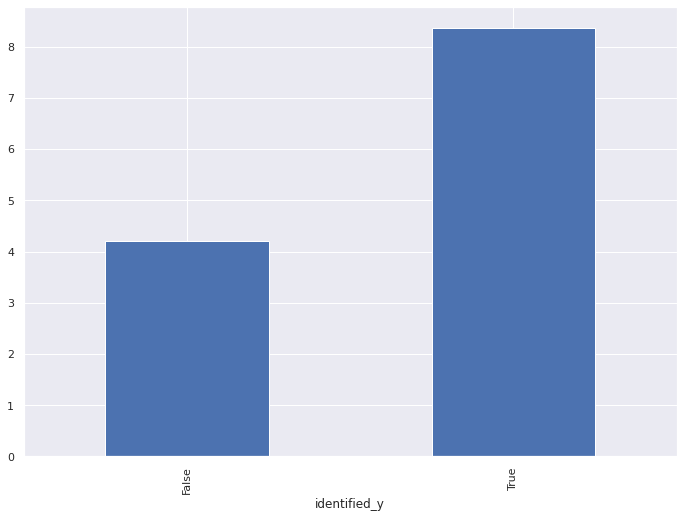

In [ ]:
login_conversion_rate.plot(kind='bar')

As the number of logged in users are overwhemingly true, we can just filter out users that are not logged in

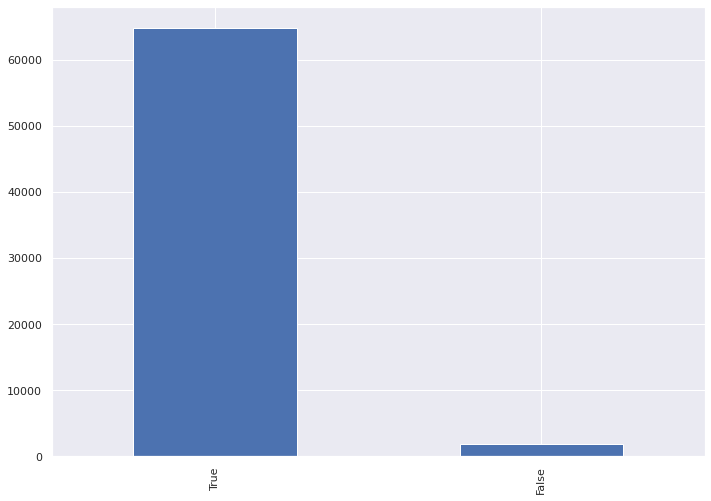

In [ ]:
merged_df['identified_y'].value_counts().plot(kind='bar')

# How are algorithims allocated between logged in users ?

In [ ]:
identified_total = merged_df.groupby(['identified_y','treatment'])['unit_id'].nunique()
identified_total_df = pd.DataFrame(identified_total)
identified_total_df = identified_total_df.reset_index(level=[0,1])

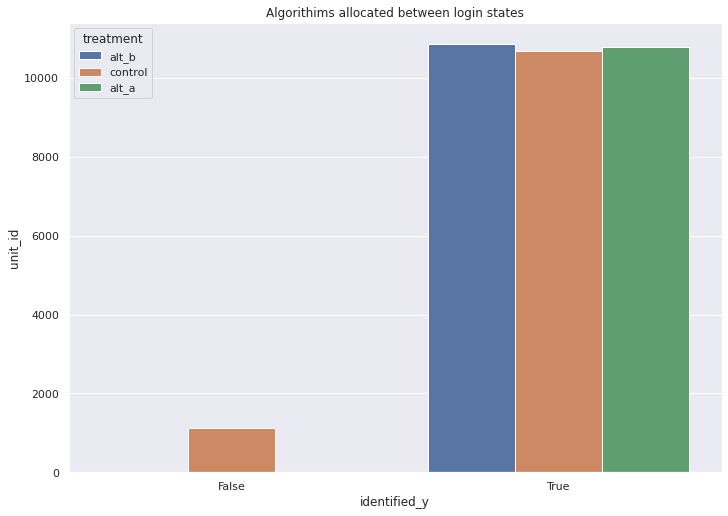

In [ ]:
ax = sns.barplot(x='identified_y',y='unit_id',hue='treatment',data=identified_total_df).set(title='Algorithims allocated between login states')

# How are the algorithims allocatted amongst different interfaces ?

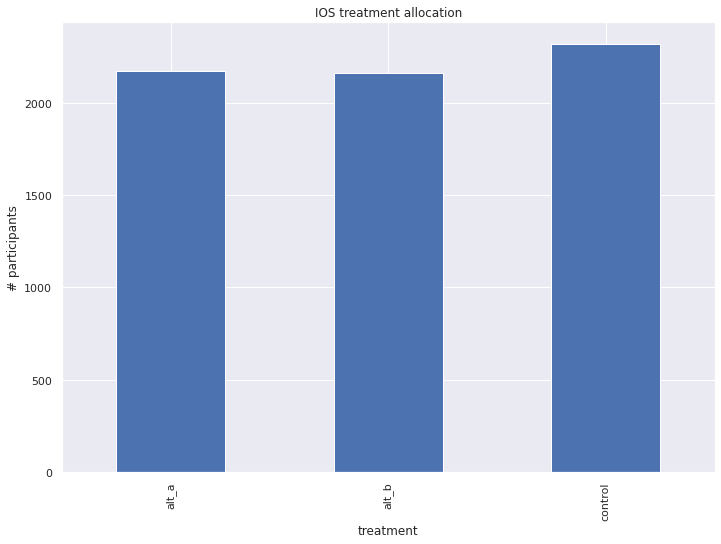

In [ ]:
# Subset the DataFrame
ios_df = merged_df[merged_df['interface_y'] == 'mobile-iOS']


alloc = ios_df.groupby(['treatment'])['unit_id'].nunique()


alloc.plot(kind='bar')
plt.title('IOS treatment allocation')
plt.ylabel('# participants')
plt.show()

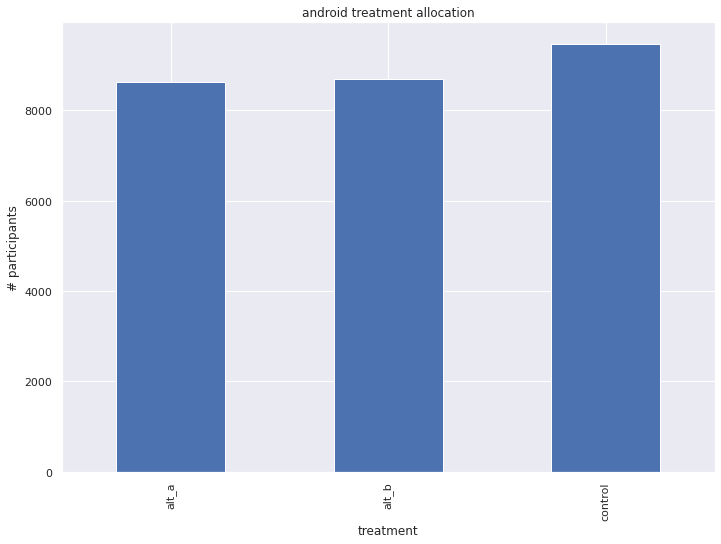

In [ ]:
android_df = merged_df[merged_df['interface_y'] == 'mobile-android']


alloc = android_df.groupby(['treatment'])['unit_id'].nunique()


alloc.plot(kind='bar')
plt.title('android treatment allocation')
plt.ylabel('# participants')
plt.show()

# get overview of our data

In [ ]:
total = merged_df.groupby(['interface_y','treatment'])['unit_id'].nunique()


converted = merged_df[merged_df['event_name'] == 'CONTENTS ENGAGED']\
                              .groupby(['interface_y','treatment'])\
                              ['unit_id'].nunique()

# Calculate the conversion rate per day
total_df = total.reset_index(level=[0,1])
total_df['total'] = total_df['unit_id']
interface_algo_conversion_rate = converted
interface_algo_df = pd.DataFrame(interface_algo_conversion_rate)
interface_algo_df = interface_algo_df.reset_index(level=[0,1])
interface_algo_df['total_unit_id'] = total_df['total']
interface_algo_df['conversion_rate'] = round((interface_algo_df['unit_id'] / interface_algo_df['total_unit_id']) * 100,2)
interface_algo_df.rename(columns = {'unit_id':'converted_unit_id'}, inplace = True)


In [ ]:
interface_algo_df

,interface_y,treatment,converted_unit_id,total_unit_id,conversion_rate
0,mobile-android,alt_a,870,8618,10.10
1,mobile-android,alt_b,785,8696,9.03
2,mobile-android,control,515,9471,5.44
3,mobile-iOS,alt_a,243,2175,11.17
4,mobile-iOS,alt_b,208,2163,9.62
5,mobile-iOS,control,129,2322,5.56


## Remove possible confounding factors

As there are slight variations to allocation of algorithims past certain dates and engagement rate on login state. We will control these factors by restricting it to certain dates and only using login == True

In [ ]:
merged_df['date_y'] =  pd.to_datetime(merged_df['date_y']) # convert to date time

cleaned_df = merged_df.loc[merged_df.date_y.between('2021-05-03','2021-05-06')] # restrict to these dates 

cleaned_df = cleaned_df[(cleaned_df['identified_y'] == True)] # only logged in users

cleaned_df = cleaned_df[['date_y','unit_id','treatment','event_name','interface_y','Converted']]

In [ ]:
cleaned_df.head()

,date_y,unit_id,treatment,event_name,interface_y,Converted
0,2021-05-05,m8wVa7J9I6XLoN6tAM3LZ9NsMu8=,alt_a,CONTENTS SEEN,mobile-android,False
1,2021-05-05,m8wVa7J9I6XLoN6tAM3LZ9NsMu8=,alt_a,CONTENTS SEEN,mobile-android,False
2,2021-05-05,9RruApLe0crXh53rUU9ljHHyEOY=,alt_a,CONTENTS SEEN,mobile-android,False
3,2021-05-05,S0loF0Ph8hDgrYDE9VzKaKvDg6I=,alt_a,CONTENTS SEEN,mobile-android,False
4,2021-05-05,S0loF0Ph8hDgrYDE9VzKaKvDg6I=,alt_a,CONTENTS SEEN,mobile-android,False


# Statisitcal power

This is needed to minimize type 2 error or false negatives. 

In [ ]:
# Set parameters
#interfacet = 
def power_analysis(interface,treatment_1,treatment_2):

  alpha = 0.05
  power = 0.9
  effect_size = 0.4
  group_1 = float(len(cleaned_df[(cleaned_df.interface_y == interface) & (cleaned_df.treatment == treatment_1)])) 
  group_2 = len(cleaned_df[(cleaned_df.interface_y == interface) & (cleaned_df.treatment== treatment_2)])
  ratio = group_1/group_2
  sample_size = group_2
  analysis = pwr.TTestIndPower()
  esresult = analysis.solve_power(effect_size = effect_size, 
                                  power = power, 
                                  nobs1 =  None, 
                                  ratio = ratio, 
                                  alpha = alpha)
  print('Minimum sample size:', round(esresult,2))

In [ ]:
#android users
android_alt_control = power_analysis('mobile-android','alt_a','control')
android_altb_control = power_analysis('mobile-android','alt_b','control')
android_altb_control = power_analysis('mobile-android','alt_a','alt_b')

Minimum sample size: 127.04
Minimum sample size: 127.95
Minimum sample size: 131.34


In [ ]:
# ios users
android_alt_control = power_analysis('mobile-iOS','alt_a','control')
android_altb_control = power_analysis('mobile-iOS','alt_b','control')
android_altb_control = power_analysis('mobile-iOS','alt_a','alt_b')

Minimum sample size: 122.24
Minimum sample size: 121.95
Minimum sample size: 132.65


We see that our sample size satisfisfied the requirment of our power analysis

# Hypothesis testing performance of algorithims between ios and android (two-tailed)

To control for confounding factors as shown in the previous code we
* Restrict dates
* Only logged in users are compared
* Segment between different interfaces

In [ ]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [ ]:
def ab_segmentation(segment):
  # Build a for loop for each interface
  for subsegment in np.unique(cleaned_df[segment].values): # this will allow us to do lift & t-test for both android and ios seperately
      print(subsegment.upper(), '\n')
      
          
      segment_df = cleaned_df[cleaned_df[segment] == subsegment] 

      converted = segment_df.groupby(['unit_id', 'treatment'])['Converted'].max()
      converted = pd.DataFrame(converted.unstack(level=1)) 
      control = converted['control'].dropna()
      alt_a = converted['alt_a'].dropna()
      alt_b = converted['alt_b'].dropna()

      print('lift alt_a vs control:', lift(control, alt_a))
      print('lift alt_b vs control:', lift(control, alt_b))
      print('lift alt_a vs alt_b:', lift(alt_b, alt_a),'\n')

      # our t-test
      ttest_a_control = ttest_ind(control, alt_a)
      ttest_b_control = ttest_ind(control, alt_b)
      ttest_alt_a_alt_b = ttest_ind(alt_a, alt_b)

      print('t-test alt_a vs control:', ttest_a_control)
      print('t-test alt_b vs control:', ttest_b_control)
      print('t-test alt_a vs alt_b:', ttest_alt_a_alt_b,'\n')

      # since we are conducting multiple test and we assume they are independent, use Sidak correction
      pvals_array = [ttest_a_control[1],ttest_b_control[1],ttest_alt_a_alt_b[1]]
      adjustedvalues=  sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method='s')
      print('adjusted results: ',adjustedvalues[0])
      print('adjusted p values: ',adjustedvalues[1])
      print('adjusted alpha Šidák: ',round(adjustedvalues[2],3),'\n')

In [ ]:
ab_segmentation('interface_y')

MOBILE-ANDROID 

lift alt_a vs control: 80.21%
lift alt_b vs control: 61.17%
lift alt_a vs alt_b: 11.81% 

t-test alt_a vs control: Ttest_indResult(statistic=-10.980704056569015, pvalue=5.8697595073233315e-28)
t-test alt_b vs control: Ttest_indResult(statistic=-8.653400628385956, pvalue=5.43501205223831e-18)
t-test alt_a vs alt_b: Ttest_indResult(statistic=2.386872063145191, pvalue=0.017003134501710194) 

adjusted results:  [ True  True False]
adjusted p values:  [0.       0.       0.050147]
adjusted alpha Šidák:  0.017 

MOBILE-IOS 

lift alt_a vs control: 105.49%
lift alt_b vs control: 77.29%
lift alt_a vs alt_b: 15.91% 

t-test alt_a vs control: Ttest_indResult(statistic=-6.816427529629711, pvalue=1.063539509257669e-11)
t-test alt_b vs control: Ttest_indResult(statistic=-5.2011000429578695, pvalue=2.074187923944943e-07)
t-test alt_a vs alt_b: Ttest_indResult(statistic=1.6451081160096803, pvalue=0.10002060813545775) 

adjusted results:  [ True  True False]
adjusted p values:  [3.1906

# Hypothesis testing performance of algorithims between ios and android (one-tailed)


In [ ]:
def ab_segmentation_one_sided(segment):
  # Build a for loop for each interface
  for subsegment in np.unique(cleaned_df[segment].values): # this will allow us to do lift t-test for both android and ios seperately
      print(subsegment.upper(), '\n')
      
          
      segment_df = cleaned_df[cleaned_df[segment] == subsegment] 

      converted = segment_df.groupby(['unit_id', 'treatment'])['Converted'].max()
      converted = pd.DataFrame(converted.unstack(level=1)) 
      control = converted['control'].dropna()
      alt_a = converted['alt_a'].dropna()
      alt_b = converted['alt_b'].dropna()

      print('lift alt_a vs control:', lift(control, alt_a))
      print('lift alt_b vs control:', lift(control, alt_b))
      print('lift alt_a vs alt_b:', lift(alt_b, alt_a),'\n')

      # our t-test
      ttest_a_control = ttest_ind(control, alt_a,alternative='less')
      ttest_b_control = ttest_ind(control, alt_b,alternative='less')
      ttest_alt_a_alt_b = ttest_ind(alt_b, alt_a,alternative='less') # switch as we are interested if alt a is greater than altb b

      print('t-test alt_a vs control:', ttest_a_control)
      print('t-test alt_b vs control:', ttest_b_control)
      print('t-test alt_a vs alt_b:', ttest_alt_a_alt_b,'\n')

      # since we are conducting multiple test and we assume they are independent, use Sidak correction
      pvals_array = [ttest_a_control[1],ttest_b_control[1],ttest_alt_a_alt_b[1]]
      adjustedvalues=  sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method='s')
      print('adjusted results: ',adjustedvalues[0])
      print('adjusted p values: ',adjustedvalues[1])
      print('adjusted alpha Šidák: ',round(adjustedvalues[2],3),'\n')

In [ ]:
ab_segmentation_one_sided('interface_y')

MOBILE-ANDROID 

lift alt_a vs control: 80.21%
lift alt_b vs control: 61.17%
lift alt_a vs alt_b: 11.81% 

t-test alt_a vs control: Ttest_indResult(statistic=-10.980704056569015, pvalue=2.9348797536616657e-28)
t-test alt_b vs control: Ttest_indResult(statistic=-8.653400628385956, pvalue=2.717506026119155e-18)
t-test alt_a vs alt_b: Ttest_indResult(statistic=-2.386872063145191, pvalue=0.008501567250855097) 

adjusted results:  [ True  True  True]
adjusted p values:  [0.         0.         0.02528849]
adjusted alpha Šidák:  0.017 

MOBILE-IOS 

lift alt_a vs control: 105.49%
lift alt_b vs control: 77.29%
lift alt_a vs alt_b: 15.91% 

t-test alt_a vs control: Ttest_indResult(statistic=-6.816427529629711, pvalue=5.317697546288345e-12)
t-test alt_b vs control: Ttest_indResult(statistic=-5.2011000429578695, pvalue=1.0370939619724715e-07)
t-test alt_a vs alt_b: Ttest_indResult(statistic=-1.6451081160096803, pvalue=0.05001030406772888) 

adjusted results:  [ True  True False]
adjusted p values